# Plot BlueSeis BSPF Events from Catalog

! Should be run in pygmt environment !

With pressure sensor parascientific and new sensor 

In [3]:
import os
import pygmt
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

from andbro__savefig import __savefig
from obspy.clients.fdsn import Client

In [4]:
from functions.catalog_to_dataframe import __catalog_to_dataframe
from functions.add_distances_and_backazimuth import __add_distances_and_backazimuth

In [5]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [6]:
config = {}

date1 = "20221001"
date2 = "20230930"

## ______________________________________________
## small bounds
# config['minlatitude'], config['maxlatitude'] = 32, 35
# config['minlongitude'], config['maxlongitude'] = -118, -115
# config['eventfile'] = "BSPF_event_catalog"

## ______________________________________________
## normal bounds
config['minlatitude'], config['maxlatitude'] = 31, 35
config['minlongitude'], config['maxlongitude'] = -119, -114
config['eventfile'] = f"BSPF_catalog_{date1}_{date2}"

## ______________________________________________
## extended bounds
# config['minlatitude'], config['maxlatitude'] = 30, 37
# config['minlongitude'], config['maxlongitude'] = -120, -113
# config['eventfile'] = "BSPF_catalog_extended"


config['BSPF_lon'] = np.array([-116.455439])
config['BSPF_lat'] = np.array([33.610643])

# config['minmagnitude'] = 2.5

config['tbeg'] = obs.UTCDateTime(date1)
config['tend'] = obs.UTCDateTime(date2)

config['triggerfile'] = f"BSPF_catalog_{date1}_{date2}_triggered.pkl"

config['gcmt_file'] = f"gcmt_solutions_{date1}_{date2}.xml"

config['path_to_data'] = data_path+"BSPF/data/"

config['path_to_catalogs'] = data_path+"BSPF/data/catalogs/"

config['out_figures'] = data_path+"BSPF/figures/"

config['outpath'] = data_path+"BSPF/"

In [7]:
def __read_pickle(path, filename):

    import pickle

    with open(path+filename, 'rb') as f:
        triggerfile = pickle.load(f)

    return triggerfile

## Load Data

### load catalog with all events

In [8]:
cat_all = obs.read_events(config['path_to_catalogs']+config['eventfile']+"_all.xml")

events_all_df = __catalog_to_dataframe(cat_all)

events_all_df = __add_distances_and_backazimuth(config['BSPF_lat'], config['BSPF_lon'], events_all_df)

In [9]:
events_all_df = events_all_df.rename_axis('timestamp').reset_index()
events_all_df['seconds'] = [abs((events_all_df.timestamp.min()-tt).total_seconds()) for tt in events_all_df.timestamp]

### load triggered events

In [10]:
cat_select_df = __read_pickle(config['path_to_catalogs'], config['triggerfile'])

In [11]:
cat_select_df

origin   latitude   longitude    depth  magnitude type  \
0   2022-10-01 05:36:11.240  33.489667 -116.507167   9120.0       1.13   ml   
1   2022-10-01 21:26:43.530  33.978000 -116.730500  15130.0       2.08   ml   
2   2022-10-02 03:25:16.440  33.484333 -116.508500   8040.0       1.49   ml   
3   2022-10-02 15:51:37.180  33.480167 -116.398000   8240.0       1.68   ml   
4   2022-10-02 21:52:54.280  33.485333 -116.509333   9650.0       0.99   ml   
..                      ...        ...         ...      ...        ...  ...   
401 2023-09-21 01:58:24.210  33.545833 -116.455000   4870.0       0.68   ml   
402 2023-09-21 21:26:10.420  34.031000 -116.912500  14140.0       2.26   ml   
403 2023-09-22 09:48:22.760  33.270167 -116.781000  11290.0       1.72   ml   
404 2023-09-27 13:41:07.510  33.496500 -116.556833  13430.0       1.18   ml   
405 2023-09-29 16:06:53.850  33.593000 -116.627833  14200.0       1.38   ml   

         seconds                 trigger_time                 arrival_time  \
0       20171.24  2022-10-01T05:36:10.344538Z  2022-10-01T05:36:11.240000Z   
1       77203.53  2022-10-01T21:26:51.594539Z  2022-10-01T21:26:43.530000Z   
2       98716.44  2022-10-02T03:25:19.219539Z  2022-10-02T03:25:16.440000Z   
3      143497.18  2022-10-02T15:51:39.919539Z  2022-10-02T15:51:37.180000Z   
4      165174.28  2022-10-02T21:52:57.319539Z  2022-10-02T21:52:54.280000Z   
..           ...                          ...                          ...   
401  30679104.21  2023-09-21T01:58:25.860000Z  2023-09-21T01:58:24.210000Z   
402  30749170.42  2023-09-21T21:26:20.975000Z  2023-09-21T21:26:22.103722Z   
403  30793702.76  2023-09-22T09:48:28.755000Z  2023-09-22T09:48:22.760000Z   
404  31239667.51  2023-09-27T13:41:10.945000Z  2023-09-27T13:41:07.510000Z   
405  31421213.85  2023-09-29T16:06:57.440000Z  2023-09-29T16:06:53.850000Z   

                      event_time  cosum  backazimuth  distances_km  
0    2022-10-01T05:36:11.240000Z    6.0   199.712618     14.252022  
1    2022-10-01T21:26:43.530000Z    6.0   328.065144     48.053535  
2    2022-10-02T03:25:16.440000Z    6.0   199.394033     14.850966  
3    2022-10-02T15:51:37.180000Z    6.0   159.749086     15.423592  
4    2022-10-02T21:52:54.280000Z    6.0   199.820062     14.772415  
..                           ...    ...          ...           ...  
401  2023-09-21T01:58:24.210000Z    4.0   179.675029      7.188470  
402  2023-09-21T21:26:10.420000Z    4.0   317.902461     62.963464  
403  2023-09-22T09:48:22.760000Z    4.0   218.807178     48.399101  
404  2023-09-27T13:41:07.510000Z    5.0   216.668239     15.777807  
405  2023-09-29T16:06:53.850000Z    5.0   263.075020     16.119754  

[406 rows x 13 columns]

### Load GCMT catalog

In [12]:
cat_gcmt = obs.read_events(config['path_to_catalogs']+config['gcmt_file'])

In [13]:
cat_gcmt_df = __catalog_to_dataframe(cat_gcmt)
cat_gcmt_df.magnitude.min(), cat_gcmt_df.shape

(5.08, (454, 5))

In [14]:
# cat_gcmt_usgs = obs.read_events(config['path_to_catalogs']+f"gcmt_solutions_{date1}_{date2}.xml")
cat_gcmt_usgs = obs.read_events(config['path_to_catalogs']+f"gmt_usgs_m3_m4.xml")

cat_gcmt_usgs = cat_gcmt_usgs.filter("magnitude >= 4.0", "time > 2022-12-31", "time < 2023-01-01")
cat_gcmt_usgs

1 Event(s) in Catalog:
2022-12-31T12:12:26.650000Z | +33.398, -116.393 | 4.14 Mw | manual

### Load shape file for faults

from USGS: https://usgs.maps.arcgis.com/apps/webappviewer/index.html?id=5a6038b3a1684561a9b0aadf88412fcf

In [15]:
faults = gpd.read_file(config['path_to_data']+"hazfaults2014/hazfaults2014.shp")

In [16]:
# x,y = faults.geometry[0].coords.xy
# print(np.array(x))
# plt.plot(x,y)

### Load urban area shape file

In [ ]:
citiesShp = os.path.join(config['path_to_data']+"urban_area/"+"ne_10m_urban_areas_landscan.shp")

gdf = gpd.read_file(citiesShp)

In [ ]:
urban = []

urban.append(gdf[gdf['name_conve'] == "San Diego"])
urban.append(gdf[gdf['name_conve'] == "Palm Springs"])
urban.append(gdf[gdf['name_conve'] == "Los Angeles1"])


In [ ]:
# for i in gdf[gdf['max_pop_al'] > 2e6].name_conve:
#     if "Los" in i:
#         print(i)

In [ ]:
# region = [-119, -114, 31, 35]

# fig = pygmt.Figure()
# fig.basemap(region=region, projection="M4i", frame=True)

# fig.coast(
#             water='skyblue',
#             shorelines=True
# )


# for urban_shp in urban:
#     fig.plot(data=urban_shp, fill="darkred")

# fig.show();

## Plot Triggered Catalog

In [17]:
events_all_df[events_all_df.magnitude > 4.1]

timestamp   latitude   longitude    depth  magnitude type  \
1681 2023-08-02 05:38:08.620  33.186000 -115.573500   3110.0       4.12   mw   
2173 2023-07-16 19:37:19.980  31.542167 -114.397167   5970.0       4.28   mw   
2175 2023-07-16 19:16:05.100  31.566333 -114.414667   5970.0       4.57   mw   
2185 2023-07-16 10:37:12.520  31.538833 -115.679500   5820.0       4.18   ml   
4747 2023-04-30 07:58:19.380  33.203667 -115.585833   1890.0       4.26   mw   
4771 2023-04-30 07:10:10.180  33.189333 -115.593333   1880.0       4.29   mw   
4772 2023-04-30 07:09:34.500  33.200833 -115.590000   2040.0       4.33   mw   
5818 2023-04-01 01:16:07.810  33.381667 -116.909667  12960.0       4.15   mw   
7716 2023-01-25 10:00:54.680  33.885000 -118.704500  14710.0       4.19   mw   
8352 2022-12-31 12:12:26.650  33.397500 -116.393333   3880.0       4.14   mw   

      backazimuth  distances_km      seconds  
1681   119.613822     94.604007  26371774.19  
2173   139.326076    299.933890  24953325.55  
2175   139.243789    296.810197  24952050.67  
2185   162.195269    241.030534  24920918.09  
4747   118.921940     92.633226  18258584.95  
4771   119.988859     92.820385  18255695.75  
4772   119.209818     92.450188  18255660.07  
5818   239.091314     49.261011  15728853.38  
7716   278.931825    210.596640  10057940.25  
8352   166.264929     24.334570   7905832.22

### Plots

In [18]:
def __plot_timeline(catalog_df, catalog_all_df):

    fig, ax = plt.subplots(1, 1, figsize=(15,5))

    catalog_all_df.sort_values("magnitude")
    catalog_df.sort_values("magnitude")

    cm = plt.get_cmap('viridis', 5)
#     cm.set_under('gray')

    cax = ax.scatter(catalog_df.origin,
                     catalog_df.distances_km,
                     s=4**catalog_df.magnitude,
                     c=catalog_df.magnitude,
                     alpha=0.8,
                     cmap=cm,
                     marker='o',
                     facecolors='none',
                     edgecolors='k',
                     vmin=0,
                     vmax=5
                    )

    ax.scatter(catalog_all_df.timestamp, catalog_all_df.distances_km,
               s=4**catalog_all_df.magnitude,
               c='grey', alpha=0.5, zorder=-1)




    cbar = plt.colorbar(cax, ax=ax, cmap=cm, pad=0.01, aspect=15, drawedges=False)
    cbar.set_label(label='Magnitude', size=16, color="white", labelpad=-31)
#     cbar.set_clim(0.0, 5.0)
#     cbar.ax.set_ylim(0.0, 5.0)
#
    ax.set_ylim(bottom=0)
    ax.set_ylabel("Epicentral Distance (km)", fontsize=16)

    ax.grid(axis="y", ls="--", zorder=0, color="k", alpha=0.3)

    ax.set_xlim(ax.get_xlim()[0]+5, ax.get_xlim()[1]-5)
#     ax.set_xlim(config['tbeg']-4*86400, config['tend']+4*86400)

    # ax.set_title(f"triggered={len(catalog_df)} of {len(catalog_all_df)} events", fontsize=18)

    ax.tick_params(axis="y", labelsize=14)
    ax.tick_params(axis="x", labelsize=14)

    # ax.set_ylim(0, 100)

    plt.show();
    return fig

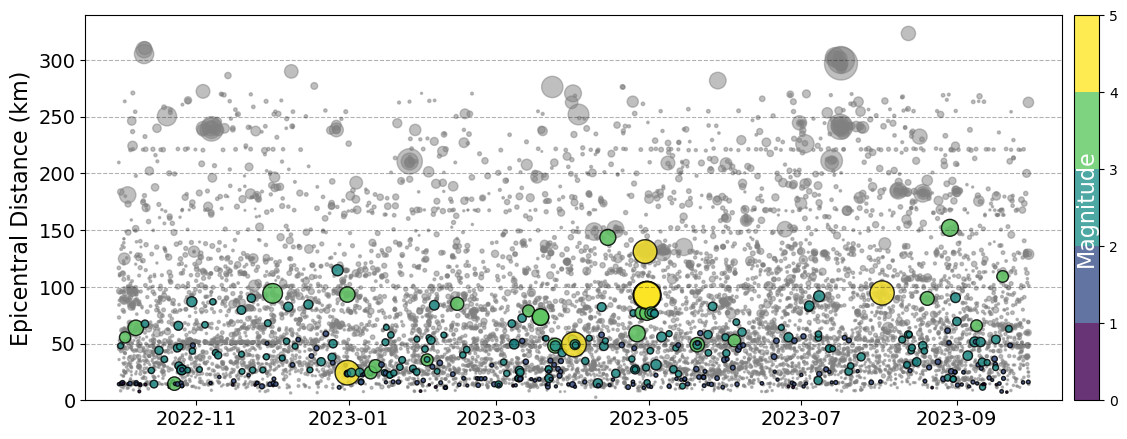

In [19]:
fig = __plot_timeline(cat_select_df, events_all_df)

fig.savefig(config['out_figures']+f"BSPF_timeline_triggered_{date1}_{date2}.png", format="png", dpi=150, bbox_inches='tight')


### Map Plot

In [188]:
def __makeplot_eventmap(config, data1, data2):

    import pygmt
    import pandas as pd
    from obspy.imaging.beachball import beach

    def __plot_focal_mechanism(catalog):

        for ii in range(len(cat_gcmt_usgs)):

            try:
                strike = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike
                rake = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake
                dip = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.dip
                mag = catalog.events[ii].magnitudes[0].mag

                lat = catalog.events[ii].origins[0].latitude
                lon = catalog.events[ii].origins[0].longitude
                dep = catalog.events[ii].origins[0].depth

                focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=mag)

                fig.meca(
                    spec=focal_mechanism,
                    scale="0.8c",
                    longitude=lon,
                    latitude=lat,
                    depth=dep,
                )

            except:
                print(f" -> failed for event {ii}")


    # Set the region
    region = [config['minlongitude'], config['maxlongitude'], config['minlatitude'], config['maxlatitude']]

    resolution = "03s" ## "01d"

    fig = pygmt.Figure()

    # fig.basemap(region=region, projection="M5i", frame=True)


    # make color pallets
    cmap = pygmt.makecpt(cmap='etopo1', series='-7999/5000/1000', continuous=True)
    # cmap = pygmt.makecpt(cmap='etopo1', continuous=True)

    ## define etopo data file
    topo_data = pygmt.datasets.load_earth_relief(resolution=resolution, region=region, data_source="gebco")
    # topo_data = '@earth_relief_30s'

    ## adjust land and sea/lakes
    # land = topo_data * pygmt.grdlandmask(region=region,
    #                                      spacing=resolution,
    #                                      maskvalues=[0, 1],
    #                                      resolution="f"
    #                                     )

    wet = topo_data * pygmt.grdlandmask(region=region,
                                        spacing=resolution,
                                        maskvalues=[1, "NaN"],
                                        resolution="f"
                                       )
    #plot high res topography
    fig.grdimage(
        grid=topo_data,
        region=region,
        projection='M5i',
        shading=True,
        cmap = cmap,
        frame=True,
        nan_transparent=True
    )


#     cmap_wet = pygmt.makecpt(cmap='etopo1', series='-7999/5000/1000', continuous=True)

    fig.grdimage(
        grid=wet,
        region=region,
        projection='M5i',
        shading=True,
        cmap='seafloor',
        frame=False,
        nan_transparent=True,
    )




    ## add coastlines
    fig.coast(shorelines=True, borders="1/0.4p,black,solid", frame=False)

    ## add map scale
    fig.basemap(map_scale="jBL+c32+f+w50k+u+o10.9/.57",frame=False)

    ## add north rose
    fig.basemap(rose='jTR+o0.3c+w1c',frame=False)

    ## add urban areas
    for urban_shp in urban:
        fig.plot(data=urban_shp, fill="darkred")

    ## add fault lines
    for n in range(faults.shape[0]):
        try:
            xx, yy = faults.geometry[n].coords.xy
            fig.plot(x=xx,y=yy,pen="0.5p,red")
        except:
            print(n)

    ## colorbar colormap
#     cmap_mag = pygmt.makecpt(cmap="viridis", series=[data1.magnitude.min(), data1.magnitude.max()])
#     cmap_mag = pygmt.makecpt(cmap="viridis", series=[data1.timestamp.astype(str)[0], data1.timestamp.astype(str)[len(data1)-1]])
#     cmap_mag = pygmt.makecpt(cmap="viridis", series=[data1.seconds.min(), data1.seconds.max()])
    cmap_depth = pygmt.makecpt(cmap="viridis", series=[data1.depth.min()/1000, data1.depth.max()/1000])

#     ## plot data coordinates
    fig.plot(
        x=data2.longitude,
        y=data2.latitude,
        size=0.04*2**data2.magnitude,
        fill='grey',
        style="cc",
        pen="0p,black",
    )

    fig.plot(
        x=data1.longitude,
        y=data1.latitude,
        size=0.04*2**data1.magnitude,
        fill=data1.depth/1000,
#         fill=data1.seconds,
        cmap=True,
        style="cc",
        pen="0.1p,black",
        transparency=50,
    )

    ## plot PFO
    fig.plot(
        x=config['BSPF_lon'],
        y=config['BSPF_lat'],
        size=np.array([0.3]),
        fill="red",
        style="t0.5c",
        pen="black",
    )

    fig.text(
        text="PFO",
        x=config['BSPF_lon'],
        y=config['BSPF_lat'],
        offset=[0.35],
        font="9p,Helvetica-Bold,black"
    )

    ## add beachball
    # __plot_focal_mechanism(cat_gcmt_usgs)


    ## add depth colorbar
#     fig.colorbar(frame='af+l"Depth (km)"', cmap=cmap_depth)
#     fig.colorbar(frame='af+l"Days"', transparency=20, cmap=cmap_mag,
#                  position="JMR+o-2.2c/3.1c+w5c/0.5c+n+mc", scale=1/86400,
#                  box="+gwhite+c0.1+r")

    fig.colorbar(frame='af+l"Depth (km)"', transparency=20, cmap=cmap_depth,
                 position="JMR+o-2.2c/3.5c+w3.2c/0.5c+n+mc",
                 # box="+gwhite+c0.1+r",
                )

    cmap = pygmt.makecpt(cmap='etopo1', series='-8000/5000/1000', continuous=True)
    fig.colorbar(cmap=cmap, position="g-114.85/32.1+w3.3c/0.5c", # box="+gwhite+c0.1+r",
                 frame='af+lElevation (km)', scale=0.001, transparency=20)
    # frame=["x+lElevation (km)", r"y+l(km)"],

    ## ________________________________________________
    ## overview plot

    region2 = [-128, -50, 20, 55]

    with fig.inset(position="jBL+o0.5c/0.2c", box="+pblack", region=region2, projection="M4c"):
        # Use a plotting method to create a figure inside the inset.
        fig.coast(
            land="gray",
            borders=[1, 2],
            shorelines="1/thin",
            water="white",
            # Use dcw to selectively highlight an area
#             dcw="US+gred",
        )
        fig.plot(
            x=config['BSPF_lon'],
            y=config['BSPF_lat'],
            size=np.array([0.3]),
            fill="red",
            style="t0.3c",
            pen="black",
        )


#     ## save figure to file
#     fig.savefig(config['outpath']+'tmp_event_map.png')

    fig.show();
    return fig

394


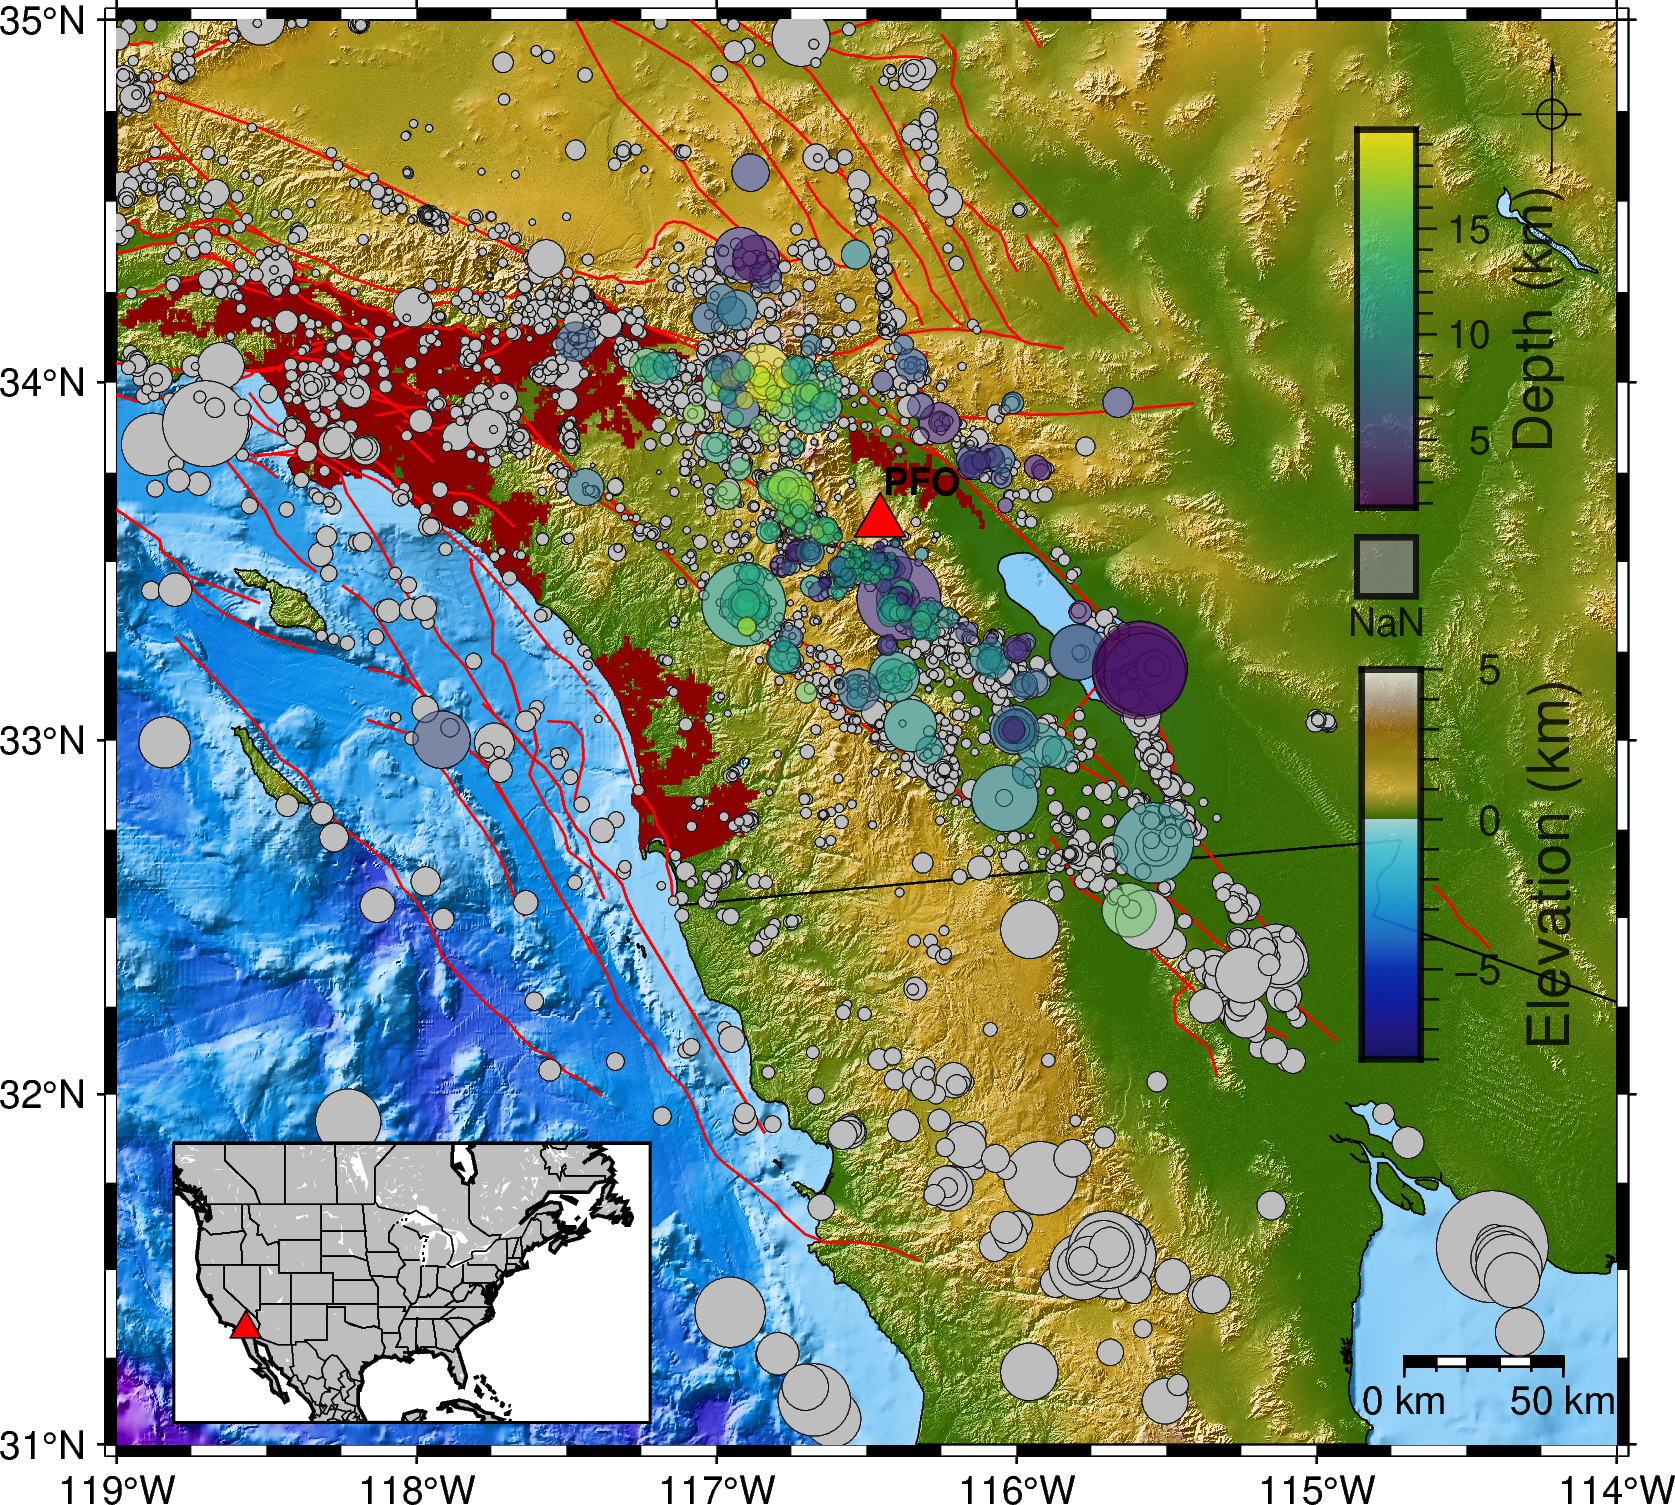

In [189]:
fig = __makeplot_eventmap(config, cat_select_df, events_all_df)

In [190]:
fig.savefig(config['out_figures']+"BSPF_map_triggered_X.png")

### Centered Plot

In [21]:
# client = Client("ISC")

## events - all in area and time period
# events_all = client.get_events(minlatitude=config['minlatitude'], maxlatitude=config['maxlatitude'],
#                                minlongitude=config['minlongitude'], maxlongitude=config['maxlongitude'],
#                                starttime=config['tbeg'],
#                                endtime=config['tend'],
#                                )

In [22]:
# origin = event.preferred_origin() or event.origins[0]
# focmec = event.preferred_focal_mechanism() or event.focal_mechanisms[0]
# tensor = focmec.moment_tensor.tensor
# moment_list = [tensor.m_rr, tensor.m_tt, tensor.m_pp,
#                tensor.m_rt, tensor.m_rp, tensor.m_tp]

In [43]:
def __makeplot_polarmap(config, data1, data2):

    import pygmt

    def __plot_focal_mechanism(catalog):

        for ii in range(len(cat_gcmt_usgs)):

            try:
                strike = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike
                rake = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake
                dip = catalog.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.dip
                mag = catalog.events[ii].magnitudes[0].mag

                lat = catalog.events[ii].origins[0].latitude
                lon = catalog.events[ii].origins[0].longitude
                dep = catalog.events[ii].origins[0].depth

                focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=mag)

                fig.meca(
                    spec=focal_mechanism,
                    scale="0.8c",
                    longitude=lon,
                    latitude=lat,
                    depth=dep,
                )

            except:
                print(f" -> failed for event {ii}")


    reg = [config['minlongitude'], config['maxlongitude'], config['minlatitude'], config['maxlatitude']]

    scale = "8c"

    proj = f"E{config['BSPF_lon'][0]}/{config['BSPF_lat'][0]}/1/{scale}"

    resolution = "03s"

    ## __________________________________________

    fig = pygmt.Figure()

    fig.coast(projection=proj, region=reg, land="gray")


    fig.basemap(
        region=[0, 360, 0, 10],
        projection=f"P{scale}+a",
        frame=["xa45f", "+t"],
    )


    # make color pallets
    cmap = pygmt.makecpt(cmap='etopo1', series='-7999/5000/1000', continuous=True)

    ## define etopo data file
    topo_data = pygmt.datasets.load_earth_relief(resolution=resolution, region=reg)


    ##plot high res topography
    fig.grdimage(
        grid=topo_data,
        region=reg,
        projection=proj,
        shading=True,
        cmap = cmap,
        frame=True,
        nan_transparent=True
    )

    wet = topo_data * pygmt.grdlandmask(region=reg,  spacing=resolution, maskvalues=[1, "NaN"], resolution="f")

    fig.grdimage(
        grid=wet,
        region=reg,
        projection=proj,
        shading=True,
        cmap='seafloor',
        frame=True,
        nan_transparent=True
    )

    fig.coast(shorelines=True, borders="1/0.4p,black,solid", frame=False)

    ## colorbar colormap
    # cmap = pygmt.makecpt(cmap="viridis", series=[data1.magnitude.min(), data1.magnitude.max()])
    # cmap = pygmt.makecpt(cmap="viridis", series=[data1.seconds.min(), data1.seconds.max()])
    cmap = pygmt.makecpt(cmap="viridis", series=[data1.depth.min()/1000, data1.depth.max()/1000])

    ## add fault lines
    for n in range(faults.shape[0]):
        try:
            xx, yy = faults.geometry[n].coords.xy
            fig.plot(x=xx,y=yy,pen="0.5p,red")
        except:
            print(n)


    ## plot data coordinates
    # data2.sort_values("magnitude", ascending=False)

    # fig.plot(
    #     x=data2.longitude,
    #     y=data2.latitude,
    #     size=0.04*2**data2.magnitude,
    #     fill='grey',
    #     style="cc",
    #     pen="0p,black",
    # )

    data1.sort_values("magnitude", ascending=False)

    fig.plot(
        x=data1.longitude,
        y=data1.latitude,
        size=0.04*2**data1.magnitude,
        fill=data1.depth/1000,
        cmap=True,
        style="cc",
        pen="0.5p,black",
        transparency=50,
    )

    ## plot PFO
    fig.plot(
        region=reg, projection=proj,
        x=config['BSPF_lon'],
        y=config['BSPF_lat'],
        size=np.array([0.3]),
        fill="red",
        style="t0.5c",
        pen="black",
    )

    fig.text(
        region=reg, projection=proj,
        text="PFO",
        x=config['BSPF_lon'],
        y=config['BSPF_lat'],
        offset=[0.35],
        font="9p,Helvetica-Bold,black"
    )

    ## add beachball
    __plot_focal_mechanism(cat_gcmt_usgs)


    fig.coast(shorelines=True, borders="1/0.4p,black,solid", frame=True)


    fig.show()
    return fig

coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (0/4.6863e-310) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 63.5446 degrees.


394


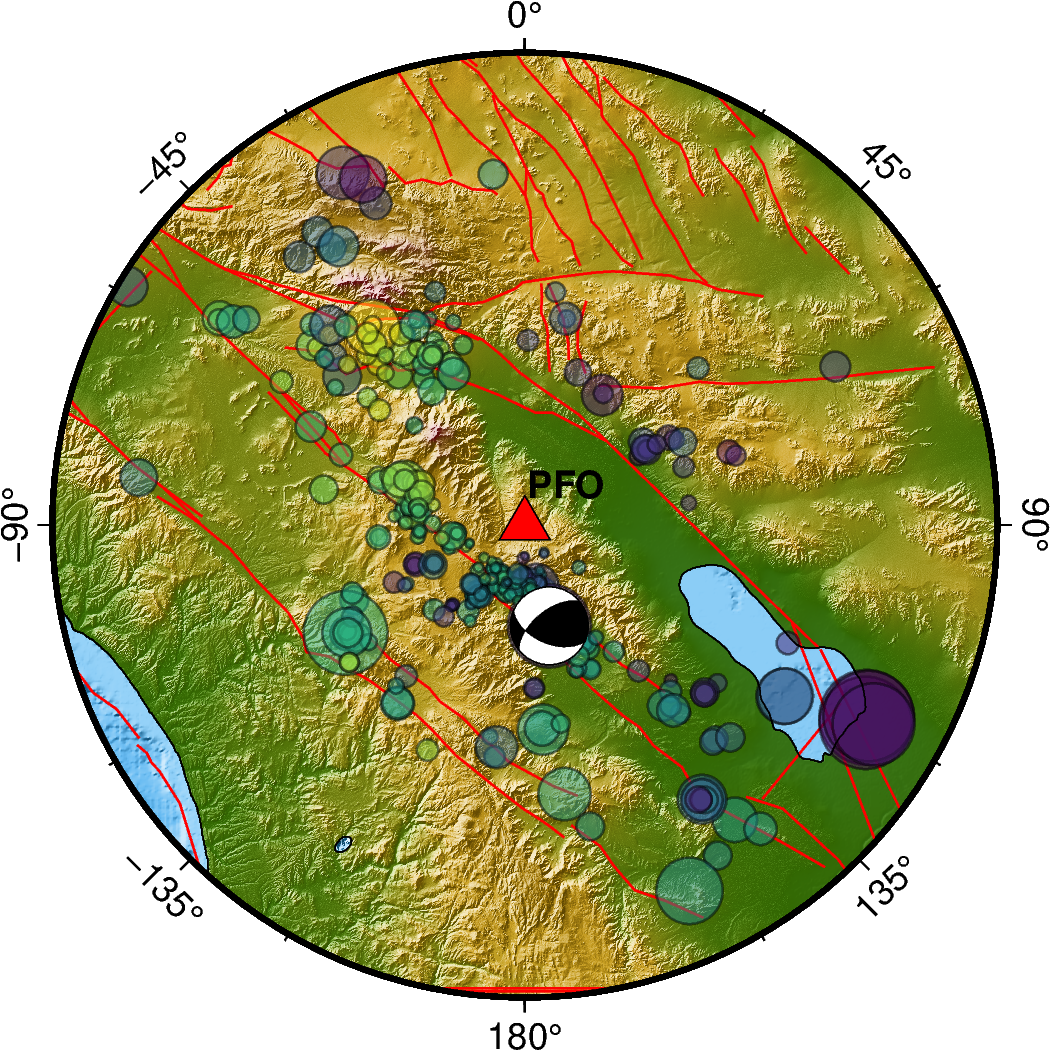

In [44]:
fig = __makeplot_polarmap(config, cat_select_df, events_all_df)

In [45]:
fig.savefig(config['out_figures']+f'BSPF_polarmap_X.png', dpi=200)

## Plot Histogram

In [19]:
def __makeplot_histogram(catalog_all_df, catalog_df):

    from sklearn.linear_model import LinearRegression
    from numpy import log10, array, linspace


    catalog_all_df = catalog_all_df.sort_values("magnitude", ascending=False)
    catalog_df = catalog_df.sort_values("magnitude")

    ## bins=11, range=[-0.75,4.75]
#     hh_cum, bins_cum, _ = plt.hist(catalog_all_df.magnitude, bins=11, range=[-0.75,4.75], rwidth=0.9, color='#3776ab', cumulative=True)
#     plt.close()
#     bins_cum = [bins_cum[jj] + (abs(bins_cum[jj+1]-bins_cum[jj])/2) for jj in range(len(bins_cum)-1)]

    ## compute bins catalog all
    nn, bins = [], []
    for i in range(-1, 7, 1):
        nn.append(len(catalog_all_df[catalog_all_df.magnitude >= i]))
        bins.append(i+0.5)

    print(len(catalog_df), len(catalog_df[catalog_df.magnitude >= 4]))
    ## compute bins catalog triggered
    nn2, bins2 = [], []
    for i in range(-1, 7, 1):
        nn2.append(len(catalog_df[catalog_df.magnitude >= i]))
        bins2.append(i+0.5)


    x, y = array(bins)[2:-1], log10(nn[2:-1])

    ## ________________________________

    fig, ax = plt.subplots(1, 1, figsize=(5,5))

    ## plot histograms catalog all
    ax.bar(array(bins), nn, width=0.75, color='lightblue', zorder=2, alpha=0.8)
    ax.bar(x, 10**y, width=0.75, zorder=2)

    ## plot histograms catalog triggered
    ax.bar(array(bins2), nn2, width=0.5, color='darkorange', zorder=2, alpha=0.5)
#     ax.bar(x2, 10**y2, width=0.75, zorder=2)


    ## linear regression
    model = LinearRegression().fit(x.reshape((-1, 1)), y)
    r_sq = model.score(x.reshape((-1, 1)), y)
    x_axis = linspace(min(bins), max(bins), 50)
    reg1 = model.intercept_ + model.coef_ * x_axis

    ax.plot(x_axis, 10**reg1, color="k", ls="--", label=f"f(x)={round(model.coef_[0],2)}x+{round(model.intercept_,1)}")

    ## linear regression
    x2, y2 = x[:-1], y[:-1]
    model = LinearRegression().fit(x2.reshape((-1, 1)), y2)
    r_sq = model.score(x2.reshape((-1, 1)), y2)
    x_axis = linspace(min(bins), max(bins), 50)
    reg2 = model.intercept_ + model.coef_ * x_axis

#     ax.plot(x_axis, 10**reg2, color="k", ls=":", label=f"f(x)={round(model.coef_[0],2)}x+{round(model.intercept_,1)}")


    ax.text(3.5, 9e3, f"Total N = {len(catalog_all_df)}", fontsize=13)

    days = str(events_all_df.index.max()-events_all_df.index.min()).split(" ")[0]
    ax.text(3.5, 4e3, f"Days = {days}", fontsize=13)

    ax.grid(zorder=-1, ls=":", alpha=0.7, which="both")

    ax.legend(loc="upper right", fontsize=12)

    ax.set_yscale("log")

    ax.set_xlabel("Magnitude", fontsize=18)
    ax.set_ylabel("Number of Events", fontsize=18)

    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

    ax.set_xticks(array(bins)-0.5)

    ax.set_title(f"Gutenberg-Richter Relation", fontsize=18)

    ax.tick_params(axis="y", labelsize=15)
    ax.tick_params(axis="x", labelsize=15)

    ax.set_ylim(0.2e0, 1e5)
    plt.show();
    return fig

406 7


/tmp/ipykernel_484288/3575357959.py:29: RuntimeWarning: divide by zero encountered in log10
  x, y = array(bins)[2:-1], log10(nn[2:-1])


ValueError: Input y contains infinity or a value too large for dtype('float64').

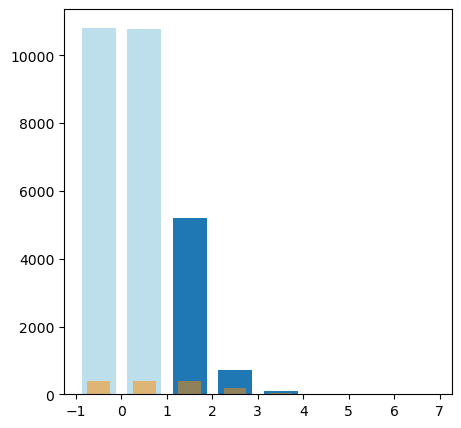

In [31]:
fig = __makeplot_histogram(events_all_df, cat_select_df)

fig.savefig("catalog_all_histo.png")


In [ ]:
import pygmt

fig = pygmt.Figure()

region = [config['minlongitude'], config['maxlongitude'], config['minlatitude'], config['maxlatitude']]


fig.basemap(region=region, projection="M15c", frame=True)

for ii in range(len(cat_gcmt_usgs)):

    try:
        strike = cat_gcmt_usgs.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike
        rake = cat_gcmt_usgs.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake
        dip = cat_gcmt_usgs.events[ii].focal_mechanisms[0].nodal_planes.nodal_plane_1.dip
        mag = cat_gcmt_usgs.events[ii].magnitudes[0].mag

        lat = cat_gcmt_usgs.events[ii].origins[0].latitude
        lon = cat_gcmt_usgs.events[ii].origins[0].longitude
        dep = cat_gcmt_usgs.events[ii].origins[0].depth

        focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=mag)

        fig.meca(
            spec=focal_mechanism,
            scale="1c",
            longitude=lon,
            latitude=lat,
            depth=dep,
        )

    except:
        print(f" -> failed for event {ii}")


fig.show()

In [ ]:
from obspy.imaging.beachball import beachball


mt = [0.91, -0.89, -0.02, 1.78, -1.55, 0.47]
beachball(mt, size=2, linewidth=2, facecolor='k')

In [ ]:
for i in range(len(cat_gcmt_usgs)):
    print(type(cat_gcmt_usgs.events[i].focal_mechanisms[0].moment_tensor))
    try:
        print(cat_gcmt_usgs.events[i].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike)
    except:
        print(i)

In [ ]:
print(cat_gcmt_usgs.events[0].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake)
print(cat_gcmt_usgs.events[0].magnitudes[0].mag)